In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from tqdm import tqdm

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from swarm_sim import *

%matplotlib inline 

In [ ]:
NB_NODES = 50
DURATION = 10000   # Nb samples
REVOLUTION = 1800  # Nb samples
SAMPLE_FREQ = 0.1  # Hz, 1 sample every 10 seconds
CONNECTION_RANGE = 30000 # m

# Variables globales pour l'analyse
SAMPLE_STEP = 12
NB_REPETITIONS = 30

# Variables globales figures
TMAX = REVOLUTION/SAMPLE_FREQ
IDX = np.arange(0, TMAX, 1/SAMPLE_FREQ) # conversion en secondes

In [ ]:
df_rnd = pd.read_csv('..\output\data\sat50_RCOST_RND_sampled12_rep30.csv', sep=',', index_col='Unnamed: 0')
df_mirw = pd.read_csv('..\output\data\sat50_RCOST_MIRW_sampled12_rep30.csv', sep=',', index_col='Unnamed: 0')
df_ffd = pd.read_csv('..\output\data\sat50_RCOST_FFD_sampled12_rep30.csv', sep=',', index_col='Unnamed: 0')
df_kmeans = pd.read_csv('..\output\data\sat50_RCOST_KMeans_sampled12_rep30.csv', sep=',', index_col='Unnamed: 0')

df_rnd = df_rnd.groupby('Nb groups').mean()
df_mirw = df_mirw.groupby('Nb groups').mean()
df_ffd = df_ffd.groupby('Nb groups').mean()
df_kmeans = df_kmeans.groupby('Nb groups').mean()

df_kmeans.head()

In [ ]:
ref_rcost_avg = df_rnd['Rcost'].iloc[0]
print('Coût de routage moyen dans le graphe original:', int(ref_rcost_avg), 'transmissions')

Coût de routage moyen dans le graphe original: 13004 transmissions


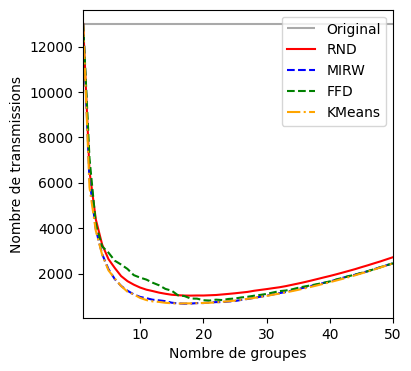

In [ ]:
plt.figure(figsize=(4,4))
idx = np.arange(1, NB_NODES+1)

col = 'Rcost' 
plt.hlines(ref_rcost_avg, xmin=1, xmax=50, colors='darkgray', label='Original')
plt.plot(idx, df_rnd[col], '-r', label='RND')
plt.plot(idx, df_mirw[col], '--b', label='MIRW')
plt.plot(idx, df_ffd[col], '--g', label='FFD')
plt.plot(idx, df_kmeans[col], ls='-.', c='orange', label='KMeans')

plt.xlabel('Nombre de groupes')
plt.ylabel('Nombre de transmissions')
plt.xlim(1,50)
plt.legend()

In [ ]:
nb_groups_opt = df_mirw['Rcost'].idxmin()
rcost_min = df_mirw['Rcost'].loc[nb_groups_opt]
print('Nombre de transmissions optimal:', round(rcost_min,0), '\t obtenu pour', nb_groups_opt, 'groupes')

Nombre de transmissions optimal: 669.0 	 obtenu pour 17 groupes


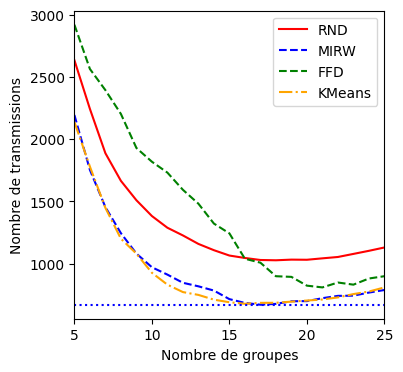

In [ ]:
plt.figure(figsize=(4,4))
start, stop = 5, 25
idx = np.arange(start, stop+1)

col = 'Rcost' 
plt.plot(idx, df_rnd[col].loc[start:stop], '-r', label='RND')
plt.plot(idx, df_mirw[col].loc[start:stop], '--b', label='MIRW')
plt.plot(idx, df_ffd[col].loc[start:stop], '--g', label='FFD')
plt.plot(idx, df_kmeans[col].loc[start:stop], ls='-.', c='orange', label='KMeans')
plt.hlines(rcost_min, xmin=start, xmax=stop, ls=':', color='blue')

plt.xlabel('Nombre de groupes')
plt.ylabel('Nombre de transmissions')
plt.xlim(start,stop)
plt.legend()